In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time

In [2]:
df = pd.read_csv('/Users/galvanize/Documents/capstone2/DATA/listings.csv.gz')

In [8]:
hosts_df = df[['id','host_id','host_name','host_since','host_location','host_total_listings_count','host_verifications','host_acceptance_rate','host_is_superhost','host_identity_verified','city','state']]

In [9]:
hosts_df

,id,host_id,host_name,host_since,host_location,host_total_listings_count,host_verifications,host_acceptance_rate,host_is_superhost,host_identity_verified,city,state
0,38585,165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States",1,"['email', 'phone', 'facebook', 'reviews', 'off...",94%,t,f,Asheville,NC
1,80905,427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",14,"['email', 'phone', 'reviews', 'jumio', 'offlin...",98%,t,f,Asheville,NC
2,108061,320564,Lisa,2010-12-16,"Asheville, North Carolina, United States",2,"['email', 'phone', 'facebook', 'reviews', 'off...",67%,f,t,Asheville,NC
3,155305,746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",7,"['email', 'phone', 'facebook', 'reviews', 'off...",99%,t,f,Asheville,NC
4,156805,746673,BonPaul,2011-06-26,"Asheville, North Carolina, United States",7,"['email', 'phone', 'facebook', 'reviews', 'off...",99%,t,f,Asheville,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
2382,43473737,43901986,Bridget,2015-09-10,"Greenville, South Carolina, United States",0,"['email', 'phone', 'reviews']",100%,f,f,Asheville,NC
2383,43495845,343440528,Ben,2020-04-08,US,9,"['email', 'phone']",100%,f,f,Asheville,NC
2384,43509635,347052146,Bird,2020-05-21,"Asheville, North Carolina, United States",1,"['email', 'phone']",NaN,f,f,Asheville,NC
2385,43525648,1767483,Becky,2012-02-17,US,0,"['email', 'phone', 'offline_government_id', 'g...",100%,f,f,Asheville,NC


In [7]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      2387 non-null   int64 
 1   host_id                 2387 non-null   int64 
 2   host_name               2387 non-null   object
 3   host_since              2387 non-null   object
 4   host_location           2386 non-null   object
 5   host_acceptance_rate    2244 non-null   object
 6   host_is_superhost       2387 non-null   object
 7   host_identity_verified  2387 non-null   object
 8   city                    2387 non-null   object
 9   state                   2387 non-null   object
dtypes: int64(2), object(8)
memory usage: 186.6+ KB


In [15]:
hosts_df['host_since'] = pd.to_datetime(hosts_df['host_since'], format= '%Y-%m-%d')
hosts_df['host_id'] =  hosts_df['host_id'].astype('str')
hosts_df['id'] =  hosts_df['id'].astype('str')

/Users/galvanize/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         2387 non-null   object        
 1   host_id                    2387 non-null   object        
 2   host_name                  2387 non-null   object        
 3   host_since                 2387 non-null   datetime64[ns]
 4   host_location              2386 non-null   object        
 5   host_total_listings_count  2387 non-null   int64         
 6   host_verifications         2387 non-null   object        
 7   host_acceptance_rate       2244 non-null   object        
 8   host_is_superhost          2387 non-null   object        
 9   host_identity_verified     2387 non-null   object        
 10  city                       2387 non-null   object        
 11  state                      2387 non-null   object        
dtypes: dat

In [20]:
# hosts_df.to_csv(r'hosts.csv')

In [43]:
listings_by_hostid = pd.DataFrame(hosts_df['host_id'].value_counts())
listings_by_hostid.reset_index(inplace=True)
listings_by_hostid.rename(columns={'host_id':'listings_count'}, inplace=True)
listings_by_hostid.rename(columns={'index':'host_id'}, inplace=True)
listings_by_hostid

,host_id,listings_count
0,167186184,54
1,149601167,30
2,96187307,24
3,3665372,23
4,134903005,19
...,...,...
1644,19960302,1
1645,15025836,1
1646,167286844,1
1647,14165703,1


In [145]:
#1338 with only one listing
listings_by_hostid[listings_by_hostid['listings_count']==1]

,host_id,listings_count,count_grp
311,16068834,1,1
312,84799065,1,1
313,71564543,1,1
314,70178019,1,1
315,99911550,1,1
...,...,...,...
1644,19960302,1,1
1645,15025836,1,1
1646,167286844,1,1
1647,14165703,1,1


In [146]:
#311 with more than 1 listing
listings_by_hostid[listings_by_hostid['listings_count']>1]

,host_id,listings_count,count_grp
0,167186184,54,41-54
1,149601167,30,21-30
2,96187307,24,21-30
3,3665372,23,21-30
4,134903005,19,11-20
...,...,...,...
306,34542878,2,2-10
307,14649701,2,2-10
308,75238397,2,2-10
309,73994689,2,2-10


In [ ]:
# majors = [students_df['studmajor']==1, students_df['studmajor']==2,
#           students_df['studmajor']==3,students_df['studmajor']==4, students_df['studmajor']==5,
#           students_df['studmajor']==6, students_df['studmajor']==7]


# choices = ['Biology', 'Engineering', 'Math', 'History', 'Computer Science', 'Classics', 'Chemistry']
# students_df['studmajor'] = np.select(majors, choices)

In [133]:
bins = [listings_by_hostid['listings_count']==1, ((listings_by_hostid['listings_count']>1) & (listings_by_hostid['listings_count']<=10)), ((listings_by_hostid['listings_count']>10) & (listings_by_hostid['listings_count']<=20)), ((listings_by_hostid['listings_count']>20) & (listings_by_hostid['listings_count']<=30)), ((listings_by_hostid['listings_count']>30) & (listings_by_hostid['listings_count']<=40)), ((listings_by_hostid['listings_count']>40) & (listings_by_hostid['listings_count']<=54))]

choices = ['1','2-10','11-20','21-30','31-40','41-54']

In [134]:
listings_by_hostid['count_grp'] = np.select(bins, choices)

In [135]:
listings_by_hostid

,host_id,listings_count,count_grp
0,167186184,54,41-54
1,149601167,30,21-30
2,96187307,24,21-30
3,3665372,23,21-30
4,134903005,19,11-20
...,...,...,...
1644,19960302,1,1
1645,15025836,1,1
1646,167286844,1,1
1647,14165703,1,1


In [136]:
listings_by_hostid[5:100]

,host_id,listings_count,count_grp
5,151397468,18,11-20
6,151279507,14,11-20
7,250328755,14,11-20
8,427027,11,11-20
9,46001530,10,2-10
...,...,...,...
95,46570936,3,2-10
96,16668128,3,2-10
97,157401925,3,2-10
98,179393643,3,2-10


In [152]:
listings_by_hostid

,host_id,listings_count,count_grp
0,167186184,54,41-54
1,149601167,30,21-30
2,96187307,24,21-30
3,3665372,23,21-30
4,134903005,19,11-20
...,...,...,...
1644,19960302,1,1
1645,15025836,1,1
1646,167286844,1,1
1647,14165703,1,1


In [153]:
# listings_by_hostid.to_csv(r'listings_by_hostid.csv')

In [144]:
listings_by_hostid.describe()

,listings_count
count,1649.000000
mean,1.447544
std,2.070322
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,54.000000


In [143]:
listings_by_hostid[listings_by_hostid['listings_count']==25]

,host_id,listings_count,count_grp


In [140]:
listings_by_hostid[listings_by_hostid['count_grp']=='11-20']

,host_id,listings_count,count_grp
4,134903005,19,11-20
5,151397468,18,11-20
6,151279507,14,11-20
7,250328755,14,11-20
8,427027,11,11-20


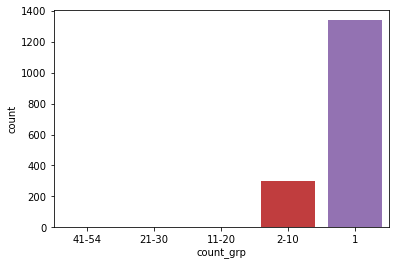

In [149]:
sns.countplot( x='count_grp', data=listings_by_hostid)

In [45]:
np.where(listings_by_hostid.listings_count==1)

(array([ 311,  312,  313, ..., 1646, 1647, 1648]),)

In [56]:
one_listing = listings_by_hostid['listings_count']==1

In [78]:
a = listings_by_hostid[one_listing]

In [151]:
#how to customize the bins per number of listings; ie. custom groupings
# listings_by_hostid['count_grp'].plot.hist(bins=50)

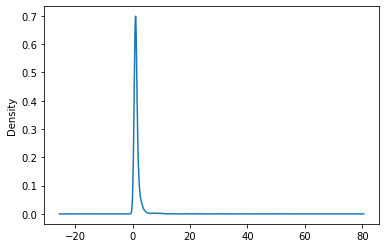

In [124]:
listings_by_hostid['listings_count'].plot.density()

In [105]:
two_and_ten = (listings_by_hostid['listings_count']>1) & (listings_by_hostid['listings_count']<=10)

In [107]:
b = listings_by_hostid[two_and_ten]
b

,host_id,listings_count
9,46001530,10
10,176228522,10
11,96305927,10
12,53185861,9
13,13532421,9
...,...,...
306,34542878,2
307,14649701,2
308,75238397,2
309,73994689,2


In [66]:
ele_and_20 = (listings_by_hostid['listings_count']>10) & (listings_by_hostid['listings_count']<=20)

In [68]:
#a =pd.DataFrame({'Fruit_price': fruit_prices, 'Inv': inventory})
# listings_buckets = pd.DataFrame({'One_Listing':listings_by_hostid['listings_count']==1})

In [80]:
c = listings_by_hostid[ele_and_20]

In [81]:
values = np.concatenate([a,b,c])

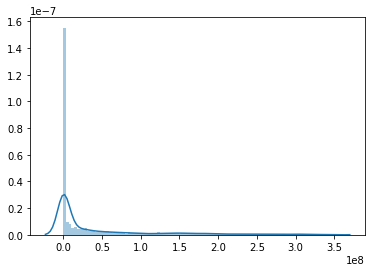

In [84]:
sns.distplot(values, bins=100)

In [104]:
# listings_by_hostid.plot( kind='bar')